In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [9]:
import nibabel as nib
import random

In [10]:
def voxel_concat(smooth1,reg1,der1,smooth2,reg2,der2):
    Vect_vox=[]
    smooth1=str(smooth1)
    smooth2=str(smooth2)
    reg1=str(reg1)
    reg2=str(reg2)
    der1=str(der1)
    der2=str(der2)
    for i in range(1000):
        fold='SLA'+str(i+1)+'_50'
        V0 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'spmT_0001.nii')).get_data().flatten()
        V1 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'mask.nii')).get_data().flatten()
        V0bis=V0[V1!=0].tolist()
        Vect_vox=Vect_vox+V0bis
    return Vect_vox;

In [11]:
def save_sample(data,name):
    random.seed(0)
    data_sample=random.sample(data,1000000)
    
    sample_file = open(name+".txt","w")
    for i in range(1000000):
        sample_file.write(str(data_sample[i]))
        if i!=999999:
            sample_file.write(" \n")
    sample_file.close()

In [17]:
def qqplot(data,num_bins):
    f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,5))

    n, bins, patches = ax1.hist(np.array(data),num_bins,normed=1)
    dist = scipy.stats.t
    y=dist.pdf(bins,999999)
    ax1.plot(bins, y, '-')

    p_th = [t/len(data) for t in range(1,len(data)+1)]
    line1, = ax2.loglog(p_th, sorted(dist.sf(np.array(data),999999)), '.', linewidth=1,
                         label='Q-Q plot')
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

In [18]:
def qqplot1(data,num_bins):
    f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,5))

    n, bins, patches = ax1.hist(np.array(data),num_bins,normed=1)
    dist = scipy.stats.t
    y=dist.pdf(bins,999999)
    ax1.plot(bins, y, '-')

    p_th = [t/len(data) for t in range(1,len(data)+1)]
    line1, = ax2.loglog(p_th, sorted(dist.sf(np.array(data),999999)), '.', linewidth=1,
                         label='Q-Q plot')
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')
    plt.show()

In [19]:
def qqplot2(data,num_bins):
    f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,5))

    n, bins, patches = ax1.hist(np.array(data),num_bins,normed=1)
    dist = scipy.stats.t
    y=dist.pdf(bins,999999)
    ax1.plot(bins, y, '-')

    p_th = [t/len(data) for t in range(1,len(data)+1)]
    line1, = ax2.plot(p_th, sorted(dist.sf(np.array(data),999999)), '.', linewidth=1,
                         label='Q-Q plot')
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')
    plt.show()

# Tailles des masques

In [25]:
mask_size_list=[]

for i in range(1000):
    fold='SLA'+str(i+1)+'_50'
    V1 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','mask.nii')).get_data().flatten()
    V1bis=V1[V1!=0].tolist()
    mask_size_list=mask_size_list+[len(V1bis)]

(array([  9.,  34.,  53.,  20.,  45.,  99., 193., 259., 237.,  51.]),
 array([129419. , 133370.7, 137322.4, 141274.1, 145225.8, 149177.5,
        153129.2, 157080.9, 161032.6, 164984.3, 168936. ]),
 <a list of 10 Patch objects>)

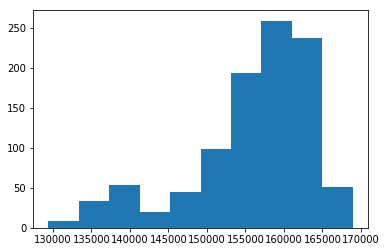

In [28]:
plt.hist(mask_size_list)

# Pipelines Sanity Check (5,6,1/5,6,1)

In [5]:
Vect_vox_561_561=[]

for i in range(1000):
    fold='SLA'+str(i+1)+'_50'
    V0 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','spmT_0001.nii')).get_data().flatten()
    V1 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','mask.nii')).get_data().flatten()
    V0bis=V0[V1!=0].tolist()
    Vect_vox_561_561=Vect_vox_561_561+V0bis

In [6]:
len(Vect_vox_561_561)

155911497

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


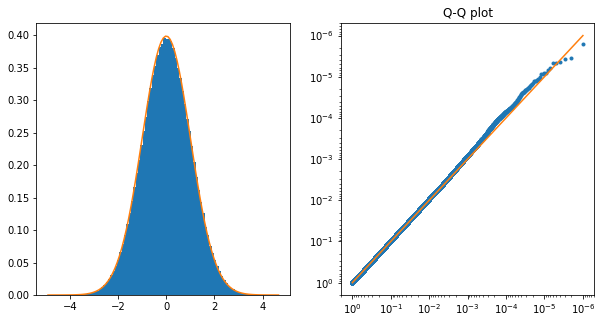

In [34]:
qqplot(Vect_vox_561_561,100)

# Other Pairs of Pipelines

## Vector definitions

In [22]:
Vect_vox_561_500 = voxel_concat(5,6,1,5,0,0);

In [49]:
save_sample(Vect_vox_561_500,"sample_561_500")

In [6]:
Vect_vox_561_501 = voxel_concat(5,6,1,5,0,1);

In [9]:
save_sample(Vect_vox_561_501,"sample_561_501")

In [8]:
Vect_vox_561_560 = voxel_concat(5,6,1,5,6,0);

In [9]:
save_sample(Vect_vox_561_560,"sample_561_560")

In [15]:
Vect_vox_561_561 = voxel_concat(5,6,1,5,6,1);

In [16]:
save_sample(Vect_vox_561_561,"sample_561_561")

In [8]:
Vect_vox_561_5240 = voxel_concat(5,6,1,5,24,0);

In [8]:
Vect_vox_561_5241 = voxel_concat(5,6,1,5,24,1);

In [5]:
Vect_vox_561_800 = voxel_concat(5,6,1,8,0,0);

In [6]:
Vect_vox_561_801 = voxel_concat(5,6,1,8,0,1);

In [5]:
Vect_vox_561_860 = voxel_concat(5,6,1,8,6,0);

In [ ]:
Vect_vox_561_861 = voxel_concat(5,6,1,8,6,1);

In [ ]:
Vect_vox_561_8240 = voxel_concat(5,6,1,8,24,0);

In [ ]:
Vect_vox_561_8241 = voxel_concat(5,6,1,8,24,1);

## Q-Q plots

In [21]:
with open("sample_561_500.txt","r") as V0:
    filecontents=V0.readlines()
Vect_vox_561_500_sample=[float(i) for i in filecontents]

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


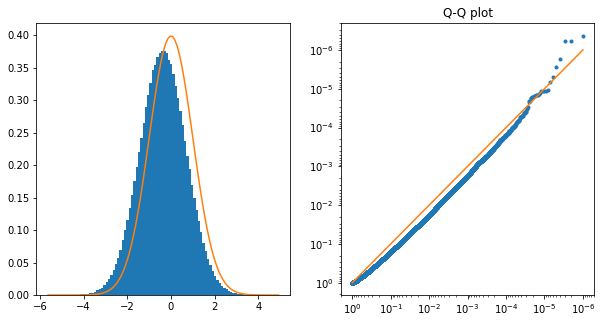

In [22]:
qqplot(Vect_vox_561_500_sample,100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


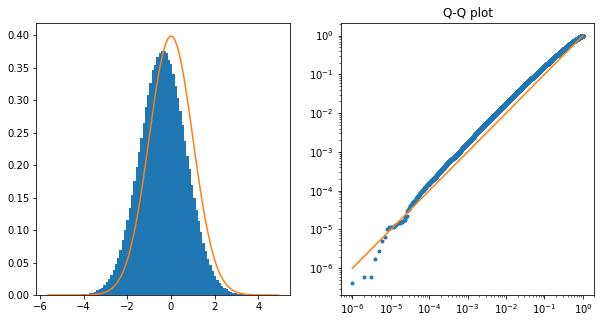

In [23]:
qqplot1(Vect_vox_561_500_sample,100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


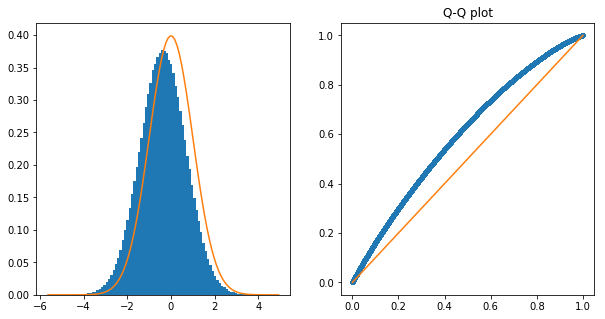

In [24]:
qqplot2(Vect_vox_561_500_sample,100)

In [25]:
with open("sample_561_501.txt","r") as V0:
    filecontents=V0.readlines()
Vect_vox_561_501_sample=[float(i) for i in filecontents]

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


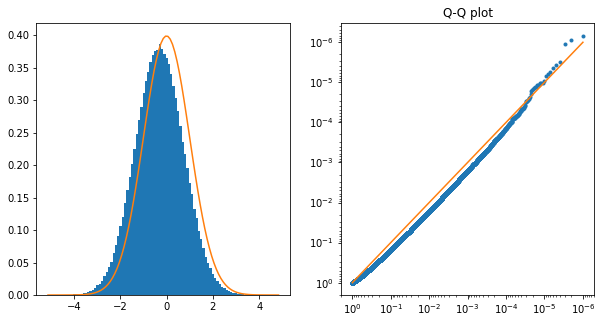

In [26]:
qqplot(Vect_vox_561_501_sample,100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


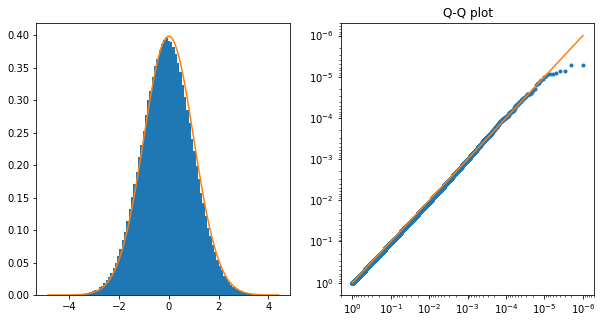

In [13]:
qqplot(Vect_vox_561_560,100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


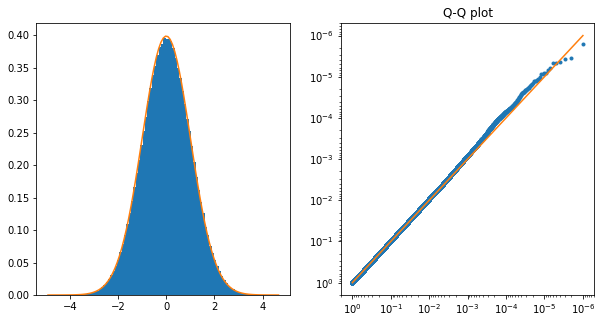

In [7]:
qqplot(Vect_vox_561_561,100)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


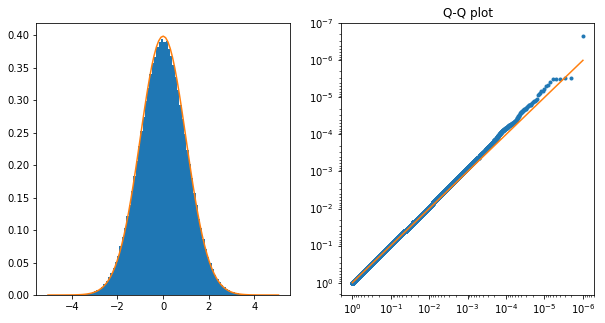

In [9]:
qqplot(Vect_vox_561_5240,100)

In [6]:
qqplot(Vect_vox_561_5241,100)

NameError: name 'Vect_vox_561_5241' is not defined

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


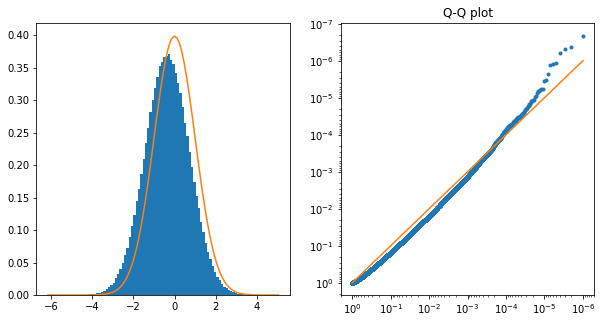

In [7]:
qqplot(Vect_vox_561_800,100)

In [9]:
qqplot(Vect_vox_561_801,100)

NameError: name 'Vect_vox_561_801' is not defined

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


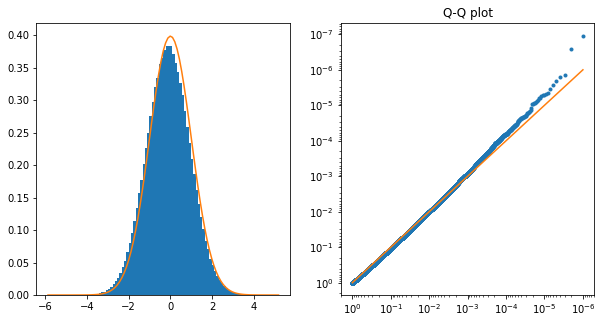

In [8]:
qqplot(Vect_vox_561_860,100)

In [3]:
import csv

In [13]:
with open("sample_561_860.csv","rb") as V0:
    V1 = csv.reader(V0,delimiter=",")

In [14]:
V1

In [15]:
V2 = []
for i in V1:
    V2=V2+[i]

ValueError: readline of closed file